In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
import scipy as sp
import os
import pandas as pd

from skimage import img_as_float
from skimage.morphology import reconstruction, h_maxima, h_minima
from skimage import morphology

import torch
import torch.nn as nn
import torch.nn.functional as F


In [8]:
df = pd.read_csv('../data/df.csv')
df['label_id'] = df.label.apply( lambda x : 0.)
df_data = df.groupby('path')
def get_data(img_id):
    if img_id not in df_data.groups:
        return dict(image_id=img_id, boxes=list())
    
    data  = df_data.get_group(img_id)
#     boxes = data['bbox'].values
    boxes = data[['xmin', 'ymin', 'w', 'h', 'label_id']].values
#     labels = data['label'].values
    return dict(image_id = img_id, boxes = boxes)
#     return dict(image_id = img_id, boxes = boxes, labels=labels)

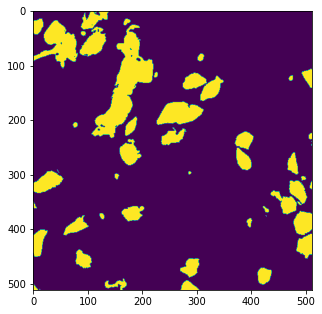

In [17]:
path = '/home/Dataset/scl/patch_images/2021.01.06/LBC24-20210102(1)/'
file_list = ['patch_images/2021.01.06/LBC24-20210102(1)/' + d for d in os.listdir(path)]
file_list[:2]

test_list = [get_data(img_id) for img_id in file_list]
test_list[:2]
img = cv2.imread('/home/Dataset/scl/' + test_list[100]['image_id'])
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray,7)
gray = cv2.resize(gray, (512,512))
bit_map = gray < 200

plt.figure(figsize=(5, 10))
plt.imshow(bit_map);

In [40]:
# import numpy as np

# def conv2d_np(image, kernel, strides):
#     kernel = np.flipud(np.fliplr(kernel)) #XCorrel
#     print(image.strides)
    
#     sub_matrices = np.lib.stride_tricks.as_strided(image,
#                                                    shape = tuple(np.subtract(image.shape, kernel.shape))+kernel.shape, 
# #                                                    strides = image.strides * 2)
#                                                    strides = strides)

#     return np.einsum('ij,klij->kl', kernel, sub_matrices)

In [41]:
# # np.pad(bit_map, (3,3), 'constant', constant_values=0).shape
# # kernel = [[1,1,1], [1,1,1], [1,1,1]]
# kernel = np.ones((64,64))
# label = conv2d_np(bit_map, kernel, (512, 32))/(64*64)


In [84]:
kernel = torch.ones((1, 1, 64,64))
# weights = weights.view(1, 1, 3, 3).repeat(1, nb_channels, 1, 1)

output = F.conv2d(torch.tensor(bit_map).reshape(1,1,512,512).float(), kernel, stride=32)

In [86]:
(output/(64*64) > 0.5 ).float().shape

torch.Size([1, 1, 15, 15])

In [77]:
torch.max((output/(64*64) > 0.5 ).float(), (output/(64*64)).float())

tensor([[[[4.7803e-01, 4.5898e-01, 4.3311e-01, 4.3945e-01, 4.9463e-01,
           4.7510e-01, 4.2529e-01, 3.3594e-01, 2.7051e-01, 2.2778e-01,
           2.2095e-01, 1.3745e-01, 1.5625e-02, 0.0000e+00, 0.0000e+00,
           0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
           0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
           0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
          [1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
           4.8242e-01, 4.1895e-01, 3.5864e-01, 3.5815e-01, 3.5986e-01,
           3.4302e-01, 2.0850e-01, 2.5391e-02, 0.0000e+00, 0.0000e+00,
           0.0000e+00, 2.6855e-03, 2.6855e-03, 2.6855e-03, 2.6855e-03,
           0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
           0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
          [1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
           3.8330e-01, 3.4009e-01, 3.5693e-01, 4.1309e-01, 4.4409e-01,
           4.4507e-01, 2.900

In [9]:
import torch
torch.sigmoid(torch.tensor(-1.))

tensor(0.2689)

In [12]:
a = torch.tensor([1,2,3])
b = torch.tensor([2,1,1])

In [13]:
torch.max(a,b)

tensor([2, 2, 3])

In [15]:
lo = torch.tensor([[0.0034, 0.0307, 0.0506,  0.0000, 0.2295, 0.0252],
        [0.2786, 0.0475, 0.0429,  0.0000, 0.0044, 0.0153],
        [0.0000, 0.0000, 0.1448,  0.1705, 0.1219, 0.1533],
        [0.0925, 0.0904, 0.0915,  0.2252, 0.2903, 0.0000],
        [0.0000, 0.1572, 0.2799,  0.0729, 0.0000, 0.0000],
        [0.1246, 0.1087, 0.0000,  0.1131, 0.3599, 0.0000]],)

In [16]:
lo.mean()

tensor(0.0924)